# Problem Solving Session 10
## Topic: Lecture 7 -  Assertions & Exceptions
##### Date: February 27, 2021
##### By: Hermine Grigoryan

## Imports

In [12]:
import sys
import os
import math

## Exercises

### Exercise 1
Write a program that accepts a hyphen-separated sequence of words as input and prints the words in a hyphen-separated sequence after sorting them alphabetically.

Sample Items : green-red-yellow-black-white

Expected Result : black-green-red-white-yellow

The function should work only on linux-based systems, and throw an error in other OS.

In [4]:
def sort_alphabetically(string):
    assert 'linux' in sys.platform, 'This function works only in Linux'
    # If the outcome of an assertion is False, the below code will not be executed
    string = string.split('-')
    string.sort()
    string = '-'.join(string)
    print(string) 
    return string

In [5]:
sort_alphabetically('green-red-yellow-black-white')

AssertionError: This function works only in Linux

### Exercise 2
Imagine that you are opeenning an online shop, and at the end of each month you apply discounts to your products. Write a function which will accept the price of the product and the discount rate, and output the discounted price. Make sure that the output is always logical (use exception handling techniques).

In [6]:
def discount_price(price, discount):
    new_price = price*(1-discount)
    if new_price <= price:
        raise UserWarning('Please specify a discount rate between 0 and 1!')
    return new_price

In [8]:
discount_price(100, 1.05)

UserWarning: Please specify a discount rate between 0 and 1!

In [5]:
print(dir(__builtins__)) # All possible built-in exceptions are here.

['ArithmeticError', 'AssertionError', 'AttributeError', 'BaseException', 'BlockingIOError', 'BrokenPipeError', 'BufferError', 'BytesWarning', 'ChildProcessError', 'ConnectionAbortedError', 'ConnectionError', 'ConnectionRefusedError', 'ConnectionResetError', 'DeprecationWarning', 'EOFError', 'Ellipsis', 'EnvironmentError', 'Exception', 'False', 'FileExistsError', 'FileNotFoundError', 'FloatingPointError', 'FutureWarning', 'GeneratorExit', 'IOError', 'ImportError', 'ImportWarning', 'IndentationError', 'IndexError', 'InterruptedError', 'IsADirectoryError', 'KeyError', 'KeyboardInterrupt', 'LookupError', 'MemoryError', 'ModuleNotFoundError', 'NameError', 'None', 'NotADirectoryError', 'NotImplemented', 'NotImplementedError', 'OSError', 'OverflowError', 'PendingDeprecationWarning', 'PermissionError', 'ProcessLookupError', 'RecursionError', 'ReferenceError', 'ResourceWarning', 'RuntimeError', 'RuntimeWarning', 'StopAsyncIteration', 'StopIteration', 'SyntaxError', 'SyntaxWarning', 'SystemError

### Exercise 3

Create a dictionary with the fifth letter of each word. If the word is not long enough, it should not print anything out.

In [14]:
food = ["chocolate", "chicken", "corn", "sandwich", "soup", "potatoes", "beef", "lox", "lemonade"]

In [15]:
fifth = dict()

for x in food:
    try:
        fifth[x] = x[4]
    except IndexError:
        pass
fifth

{'chocolate': 'o',
 'chicken': 'k',
 'sandwich': 'w',
 'potatoes': 't',
 'lemonade': 'n'}

In [16]:
fifth = dict()
for x in food:
    if len(x)>=5:
        fifth[x] = x[4]
fifth

{'chocolate': 'o',
 'chicken': 'k',
 'sandwich': 'w',
 'potatoes': 't',
 'lemonade': 'n'}

In [17]:
{i:i[4] for i in food if len(i)>5}

{'chocolate': 'o',
 'chicken': 'k',
 'sandwich': 'w',
 'potatoes': 't',
 'lemonade': 'n'}

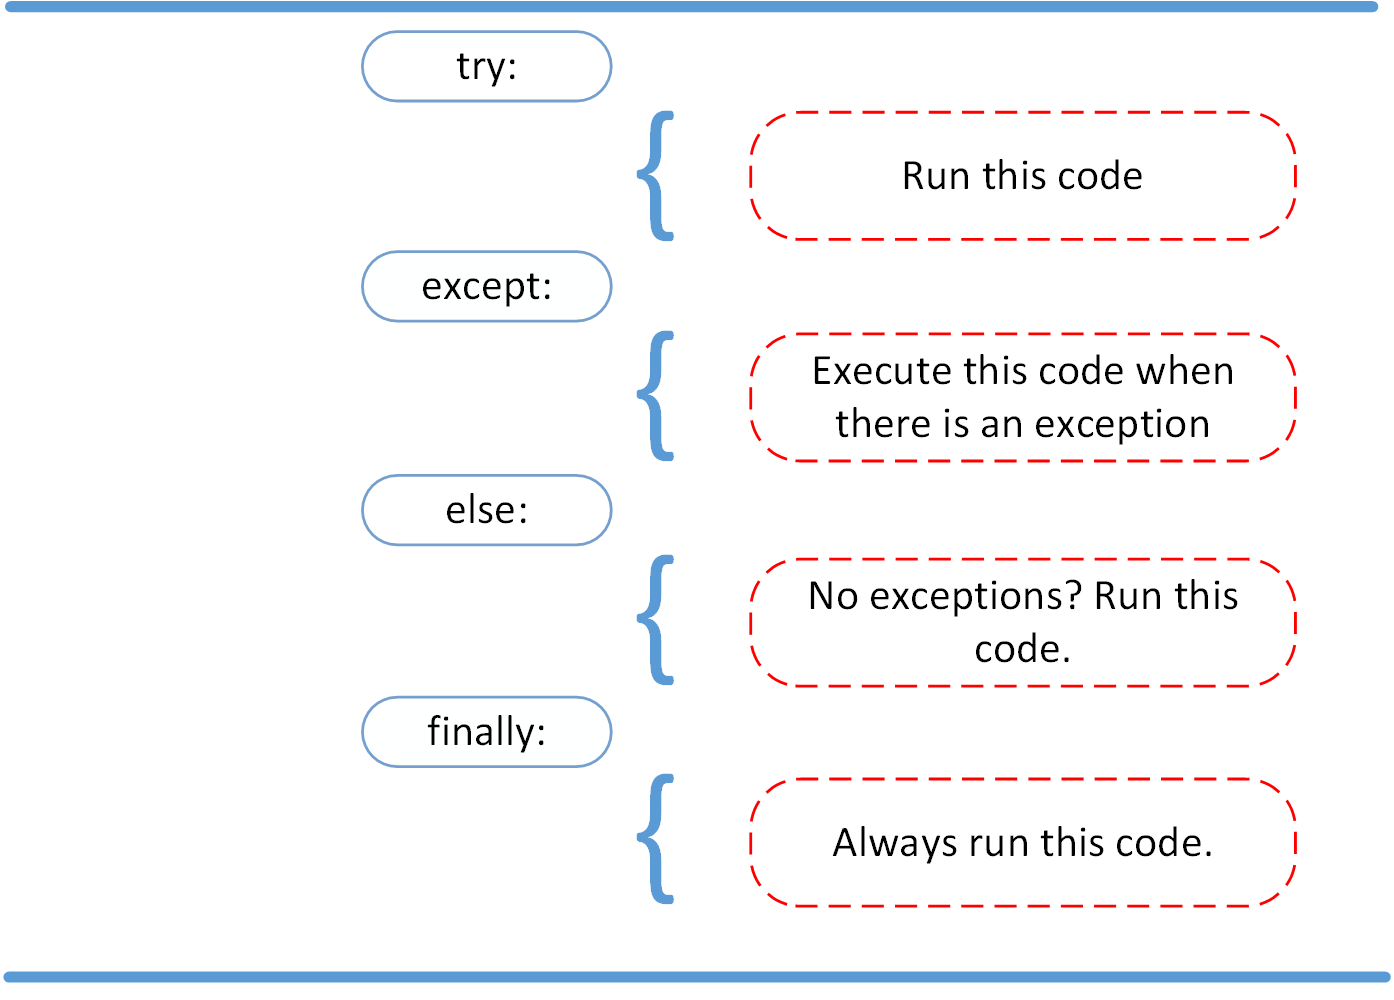

### Exercise 4
Create a program that will ask the user to provide two numbers and divide them. Handle all the exceptions accordingly. 

In [10]:
print("Give me two numbers, and I'll divide them.")
print("Enter 'q' to quit.")
print('----------------------------')

while True:
    num1 = input('First number: ')
    if num1=='q':
        break
    num2 = input('Second number: ')
    if num2=='q':
        break
    
    try:
        print(round(float(num1) / float(num2), 5))
    except ValueError:
        print('The input should be numeric!')
    except ZeroDivisionError as error:
        print('You cannot divide by zero!', error)
    else:
        print('The trial was successful!!!')
    finally:
        print('---------------------------')
    

Give me two numbers, and I'll divide them.
Enter 'q' to quit.
----------------------------
First number: 6
Second number: 7.8
0.76923
The trial was successful!!!
---------------------------
First number: 9
Second number: 0
You cannot divide by zero! float division by zero
---------------------------
First number: 10
Second number: t
The input should be numeric!
---------------------------
First number: q


### Exercise 5

Read the texts for Russian, Chinese, English, Japanese, Arabian and Indian fairy tales. How many times 'princess' occurs in each book. Handle the exceptions accordingly.

In [101]:
os.getcwd()

'C:\\Users\\hemig\\Google Drive\\Programming for DS\\PSS'

In [107]:
fairy = 'fairy_tales'
languages = ['russian', 'chinese', 'english', 'japanese', 'arabian', 'indian']
all_texts = dict()

for lang in languages:
    try:
        with open(f'texts/{lang}_{fairy}.txt', mode='r', encoding="utf-8", ) as f:
            all_texts[lang] = f.read()
    except FileNotFoundError:
        print(f'Sorry, the {lang.upper()} fairy tales are not available in your directory!')

Sorry, the CHINESE fairy tales are not available in your directory!


In [108]:
{i : all_texts[i].lower().count('princess') for i in all_texts}

{'russian': 27, 'english': 61, 'japanese': 35, 'arabian': 61, 'indian': 0}

### Exercise 6
Import `this_module_doesnt_exist` in the first line. Try to handle this error. In the second line calculate the logarithm of -10. Handle this error as well. Do some calculations in the except block and observe the output.

In [20]:
try:
    import this_module_doesnt_exist
    math.log(-10)
except ModuleNotFoundError as module_error:
    print(module_error)
except ValueError:
    print("You can't calculate the logarithm of a negative number!")

No module named 'this_module_doesnt_exist'


In [21]:
try:
    import this_module_doesnt_exist
except ModuleNotFoundError as module_error:
    print(module_error)
    
try:
    math.log(-10)
except ValueError:
    print("You can't calculate the logarithm of a negative number!")

No module named 'this_module_doesnt_exist'
You can't calculate the logarithm of a negative number!


In [24]:
try:
    import this_module_doesnt_exist
except ModuleNotFoundError as module_error:
    print(module_error)
    math.log(-10)

No module named 'this_module_doesnt_exist'


ValueError: math domain error

### Exercise 7
The program below is not very robust. We can easily make it crash.
Observe the function and see how to make it fail. Rewrite the function to handle the errors.

In [3]:
def example_func(L):
    sum = 0
    sumOfPairs = []
    for i in range(len(L)):
        sumOfPairs.append(L[i]+L[i+1])

    print("sumOfPairs = ", sumOfPairs)

In [4]:
example_func([1,2,3,4,5])

IndexError: list index out of range

In [5]:
example_func(["1",2,3,4,5])

TypeError: can only concatenate str (not "int") to str

In [10]:
def example_func(L):
    sumOfPairs = []
    for i in range(len(L)):
        try:
            sumOfPairs.append(L[i]+L[i+1])
        except IndexError:
            pass
        except TypeError:
            pass

    print("sumOfPairs = ", sumOfPairs)

In [11]:
example_func(["1",2,3,4,5])

sumOfPairs =  [5, 7, 9]


In [12]:
example_func([1,2,3,4,5])

sumOfPairs =  [3, 5, 7, 9]
